#  In-class Lab_Exercise (Decision Tree, Random Forest)

### 1.1 Explain about Data Set Information:( Mushroom Classification )

**Attribute Information**


In [12]:
# here we have to find the whether mushroom is edible or possenoues from the data.

### 1.2. Loading Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Read the csv file into a Panda Dataframe

### 1.3.Importing the dataset(mushrooms.csv):

In [66]:
df = pd.read_csv('mushrooms.csv')

### 1.4 Check the sample data head and do some simple analysis on the dataset

In [33]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 1.5. Explain about DataFrame.describe() 

In [34]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


- every feature is categorical
- class is the independent variable

### 1.6 Check the distribution of the target class using countplot?
Here the data is almost evenly distributed

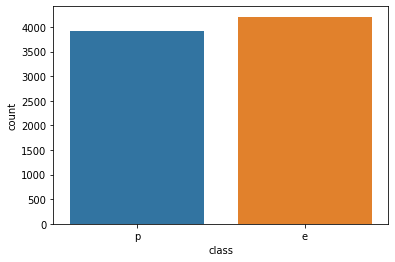

In [35]:
sns.countplot(df['class'])
plt.show()

### 1.7 Apply LabelEncoder for target variable ?

In [38]:
#df_categorical = df.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()  
df_class= pd.DataFrame(df['class']).apply(le.fit_transform)
df.drop('class',axis=1,inplace=True)
df = pd.concat([df,df_class],axis=1)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,1
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,0
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,0
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,1
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,0


### 1.8. Exploratory Data Analysis

### Try the Pairplot we can find there is no use plotting that?

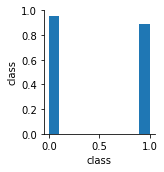

In [44]:
sns.pairplot(df)
plt.show()

### 1.9Try to create sub plots? 

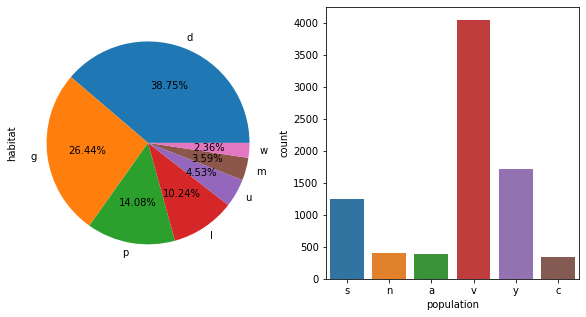

In [48]:
fig,axis = plt.subplots(1,2,figsize=(10,5))

df['habitat'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axis[0])
sns.countplot(df['population'],ax=axis[1])
plt.show()


### 1.10 Check-out the all the columns present in the dataframe

In [46]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

###### 1.10 a) Since these are categorical variables without any definite order(nominal variables),dummy variables has to be created for all the  categorical variables.

In [57]:
df = pd.get_dummies(df)

#### 1.10 b) Check out the head of the dataframe, this has created 119 columns!

In [58]:
df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 1.11 Extract the independent variable X and dependent variable Y?

In [67]:
df_categorical = df.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()              
df_categorical = df_categorical.apply(le.fit_transform)
df.drop(df_categorical.columns,axis=1,inplace=True)
df = pd.concat([df,df_categorical],axis=1)
x = df.iloc[:,df.columns != 'class']
y = df.iloc[:,df.columns == 'class']

### 1.12 Split the data into train and test set:(70/30)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

### 1.13. Implement 4 Machine Learning Models 

Let us explore the various classification algorithms and check which performs well on this dataset.
Below are the various different algorithms we are going to explore.

* Decision Tree

* Random Forest


### 1.13 a)  Build the Model for Decision tree classifier 

In [69]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [70]:
y_pred_default = dt_default.predict(x_test)
print(confusion_matrix(y_test,y_pred_default))

[[1248   10]
 [  40 1140]]


In [71]:
print("sensitivity =",1140/1180)
print("accuracy =",dt_default.score(x_test,y_test))

sensitivity = 0.9661016949152542
accuracy = 0.9794913863822805


### 1.13 b)  Build the Model for Random Forest**

In [75]:
fit_rf = RandomForestClassifier(max_depth=5,random_state=50)
fit_rf.fit(x_train,y_train)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [76]:
y_pred = fit_rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[1258    0]
 [  24 1156]]


In [78]:
print("sensitivity =",1156/(1156+24))
print("accuracy =",fit_rf.score(x_test,y_test))

sensitivity = 0.9796610169491525
accuracy = 0.9901558654634947


### 1. 14.Which is the best Model :



- here we can say that accuracy is more in Decision Tree than Random Tree.
- also the sensitivity is improved in Random Tree than Decision Tree.

In [ ]:
RandomForestClassifier is better model than DecisionTreeClassifier because accuracy and sensitvity is better.